<a href="https://colab.research.google.com/github/AnnaVirasova2004/ML-BIN-22-2/blob/main/LAB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Анализ целевой переменной Y с точки зрения статистики.

In [ ]:
# Импортирую библиотеки
!pip install pandas scikit-learn seaborn scipy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

2. Загружаем набор данных.

In [ ]:
# Загрузила набор данных
df = pd.read_csv('employee.csv')

In [ ]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low,1
14995,0.37,0.48,2,160,3,0,0,support,low,1
14996,0.37,0.53,2,143,3,0,0,support,low,1
14997,0.11,0.96,6,280,4,0,0,support,low,1


In [ ]:
# Вывела отдельно колонки
for column in df.columns:
  print(f'колонка: {column}')

колонка: satisfaction_level
колонка: last_evaluation
колонка: number_project
колонка: average_montly_hours
колонка: time_spend_company
колонка: Work_accident
колонка: promotion_last_5years
колонка: department
колонка: salary
колонка: left


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


3. Проверьте наличие пропущенных значений и работа с пропусками для числовых:

In [ ]:
# Проверяю на пропущенные значения
print(df.isnull().sum()) # пропусков нет

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64


In [ ]:
np.random.seed(42) # Создала случайную последовательность
df_test_nan = df.copy() # Создала копию
# Рандомно заменила значения на пропущенные
df_test_nan.loc[np.random.choice(df_test_nan.index, size=5, replace=True), 'satisfaction_level'] = np.nan

In [ ]:
# Проверила с изменёнными значениями
print(df_test_nan.isnull().sum()) # пропусков нет

satisfaction_level       5
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64


In [ ]:
# Вариант 1: Удаление строк с пропусками
df_drop = df_test_nan.dropna()
print("\n# Удаление строк с пропусками")
print(df.isnull().sum()) # пропусков нет


# Удаление строк с пропусками
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64


In [ ]:
# Вариант 2: Заполнение пропусков медианой
df_median = df_test_nan.copy()
# Замена пропущенных значений (в satisfaction_level) на медианное значение этого же столбца
df_median.satisfaction_level = df_median.satisfaction_level.fillna(df_median.satisfaction_level.median())

print("\n# Заполнение пропусков медианой")
print(df_median.isnull().sum()) # пропусков нет


# Заполнение пропусков медианой
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64


In [ ]:
# Вариант 3: Заполнение пропусков средним
df_mean = df_test_nan.copy()
# Замена пропущенных значений (в satisfaction_level) на среднее значение этого же столбца
df_mean.satisfaction_level = df_mean.satisfaction_level.fillna(df_median.satisfaction_level.mean())

print("\n# Заполнение пропусков средним")
print(df_mean.isnull().sum()) # пропусков нет


# Заполнение пропусков средним
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64


4. Выбираем целевую переменную.

In [ ]:
# Целевая переменная high_work_efficiency (Высокая рабочая эффективность) преобразована из average_montly_hours (среднемесячные рабочие часы)
# Если high_work_efficiency >= 230, то сотрудник работает усердно
df['high_work_efficiency'] = np.where(df['average_montly_hours'] >= 230, 1, 0).astype(int)
# 1 - высокая эффективность, 0 - низкая эффективность

In [ ]:
# Проверка наличия
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'department', 'salary', 'left',
       'high_work_efficiency'],
      dtype='object')

In [ ]:
Y = df['high_work_efficiency'] # Целевая переменная
X = df.drop('high_work_efficiency', axis=1) # Переменные для проверки влияния (кроме high_work_efficiency)

# В моем случае я дропаю базовую переменную, а не только. Y
X = X.drop('average_montly_hours', axis=1) # Убрала колонку average_montly_hours

5. Графический анализ

In [ ]:
# Список числовых колонок для построения графиков
numeric_cols = X.select_dtypes(include=['float64', 'int64'])
numeric_cols

,satisfaction_level,last_evaluation,number_project,time_spend_company,Work_accident,promotion_last_5years,left
0,0.38,0.53,2,3,0,0,1
1,0.80,0.86,5,6,0,0,1
2,0.11,0.88,7,4,0,0,1
3,0.72,0.87,5,5,0,0,1
4,0.37,0.52,2,3,0,0,1
...,...,...,...,...,...,...,...
14994,0.40,0.57,2,3,0,0,1
14995,0.37,0.48,2,3,0,0,1
14996,0.37,0.53,2,3,0,0,1
14997,0.11,0.96,6,4,0,0,1


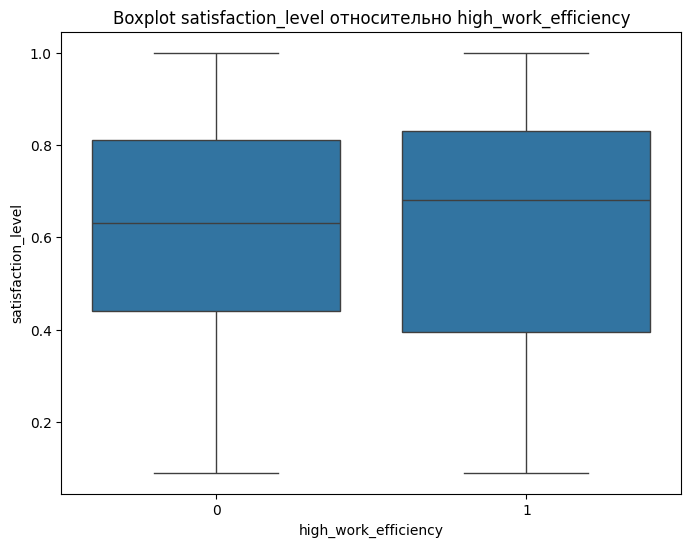

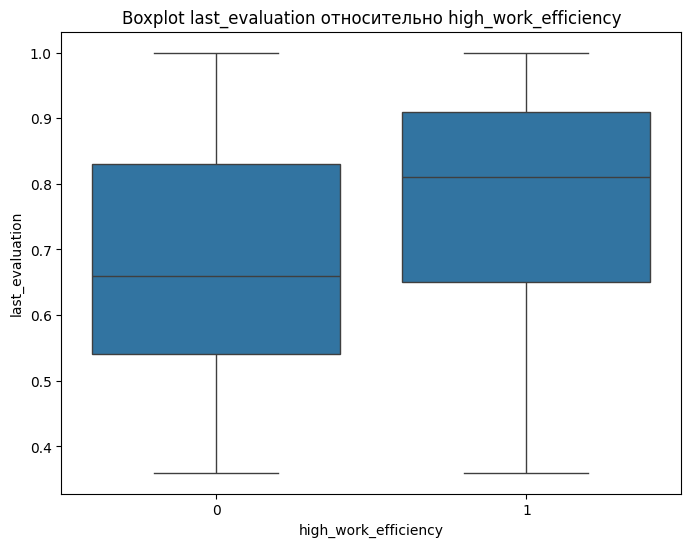

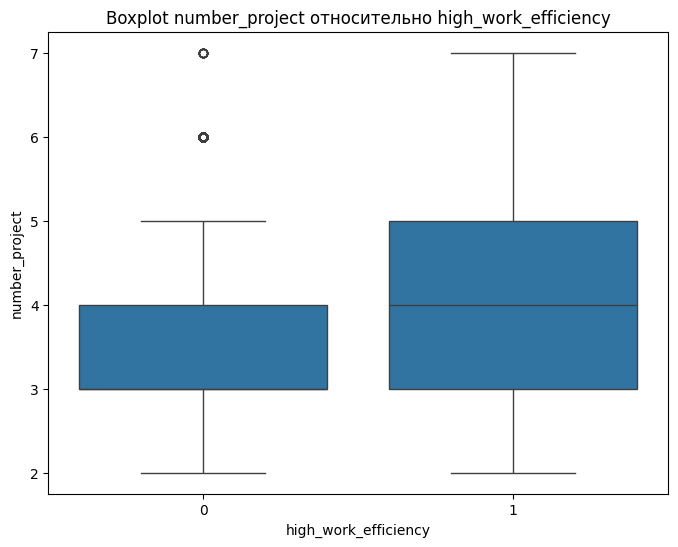

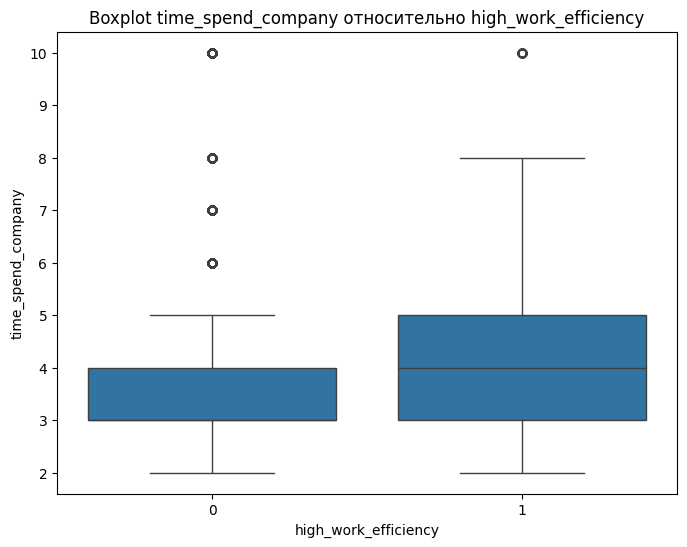

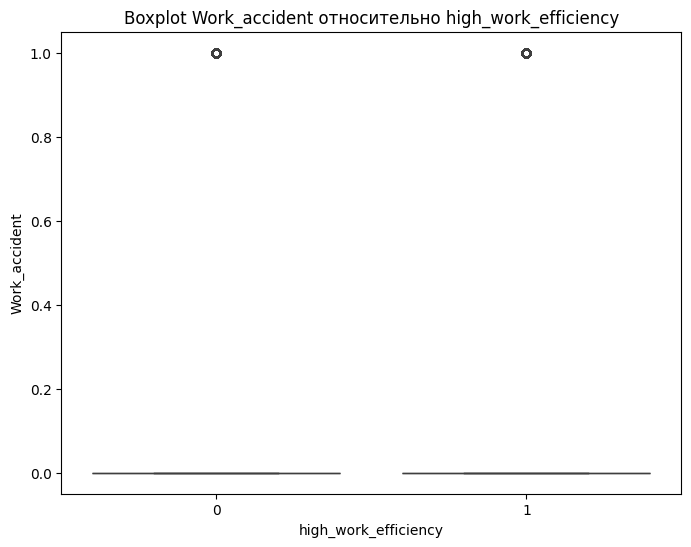

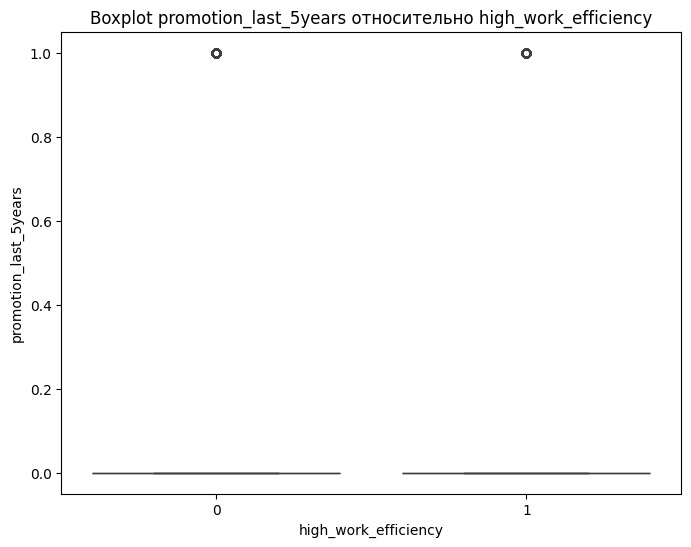

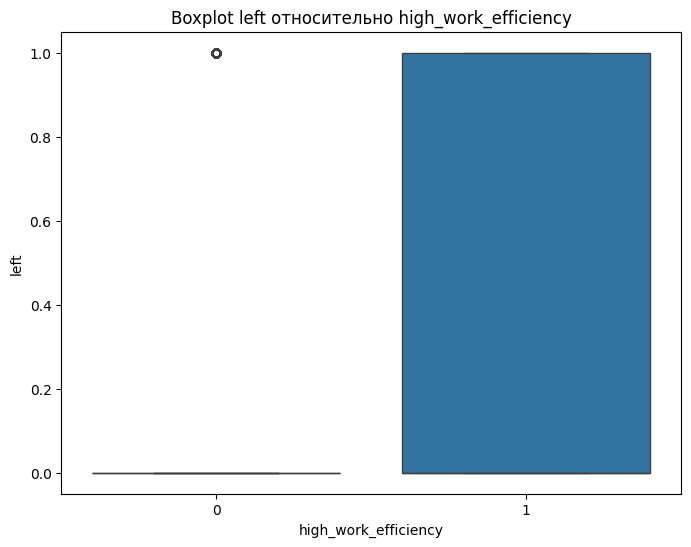

In [ ]:
# Построение boxplot для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='high_work_efficiency', y=col, data=df)
    plt.title(f'Boxplot {col} относительно high_work_efficiency')
    plt.show()

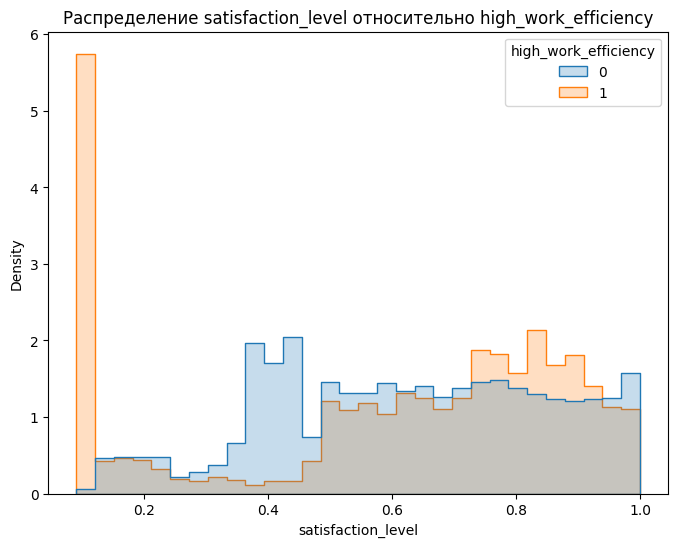

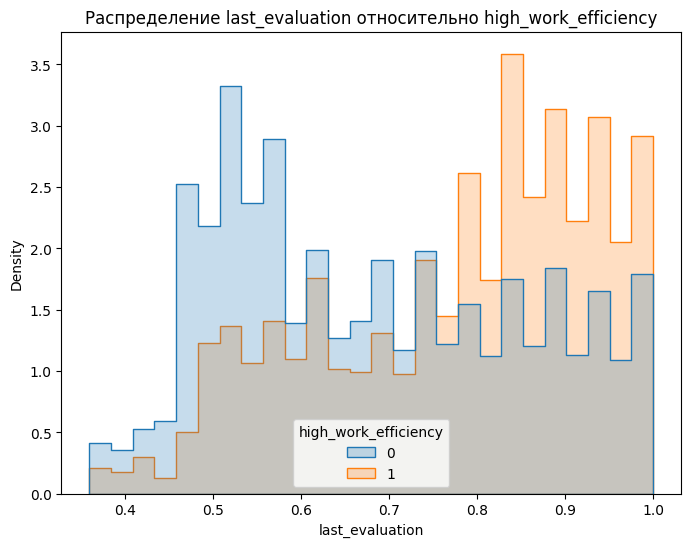

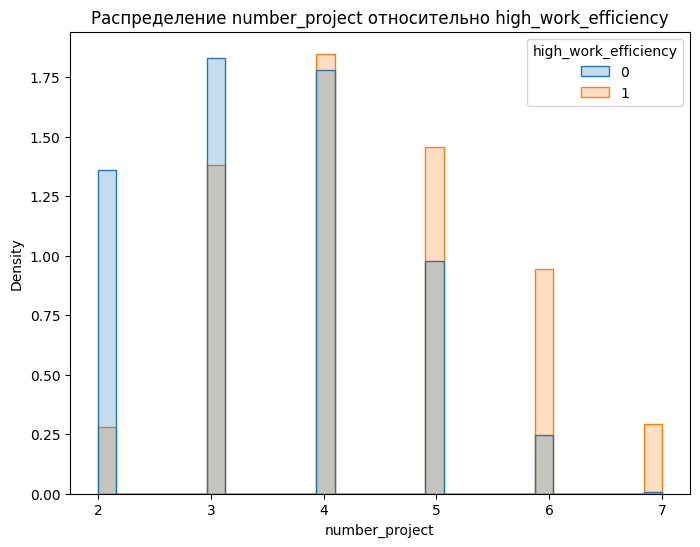

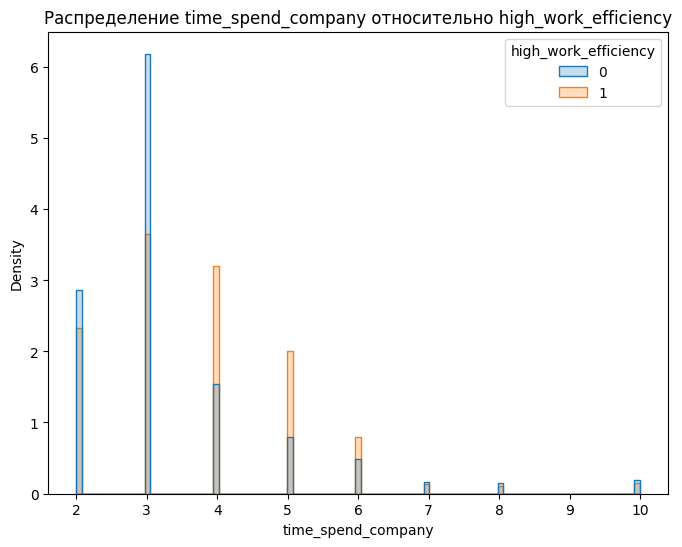

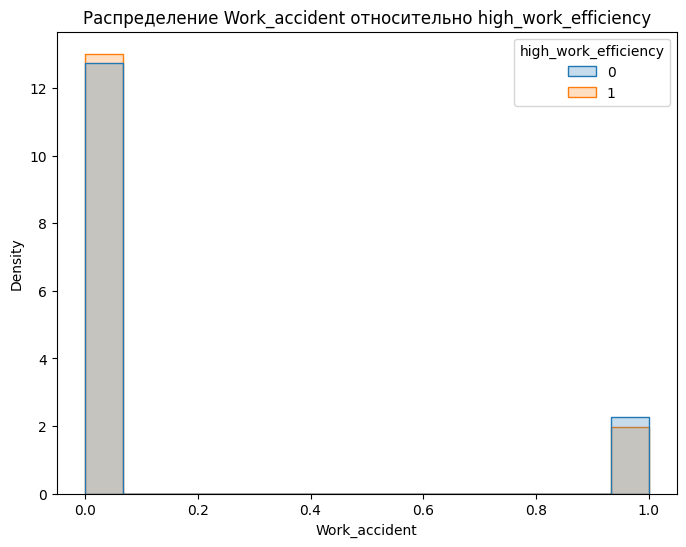

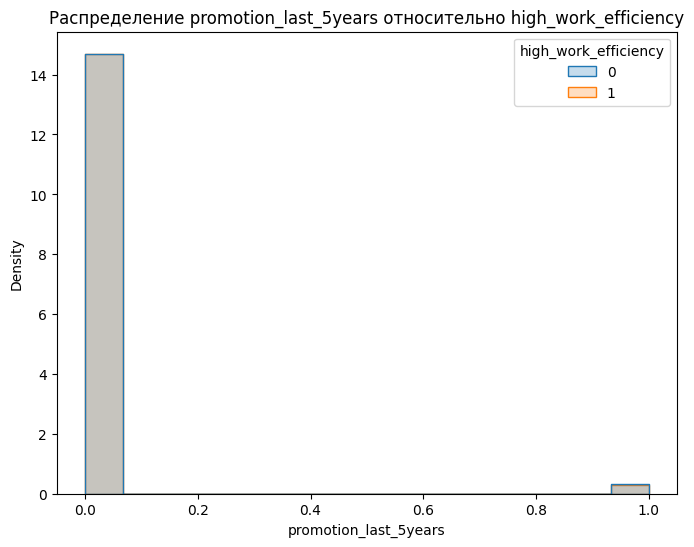

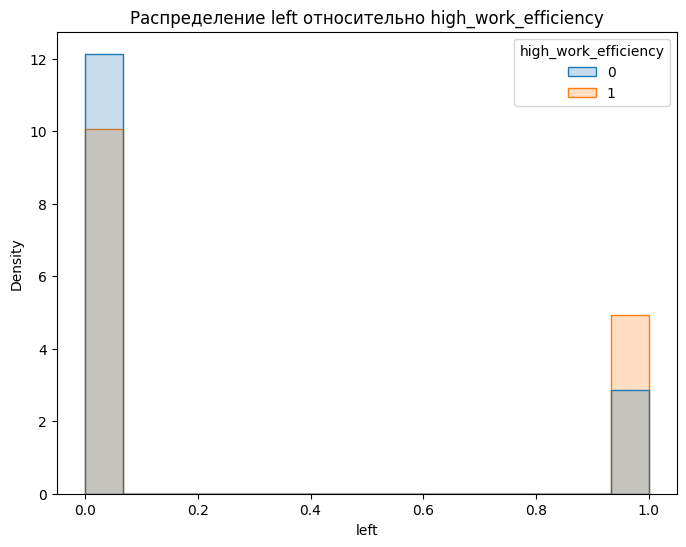

In [ ]:
# Построение диаграмм распределения для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, hue='high_work_efficiency', element="step", stat="density", common_norm=False)
    plt.title(f'Распределение {col} относительно high_work_efficiency')
    plt.show()

⏰ Анализ:
  1. Удовлетворённость сотрудников, которые проводят на работе больше 230 часов, меньше, так как медиана расположена ближе к верхней границы;
  2. Чем больше сотрудник проводит времени на работе, тем меньше выходит его крайняя оценка проделанной работы;
  3. Количество сделанных проектов напрямую зависит от кол-ва времени работы сотрудника (чем > времени, тем > проектов);
  4. Количество проведённого времени в компании напрямую зависит от среднемесячных рабочих часов сотрудников (чем > рабочих часов, тем > времени);
  5. и 6. Недостаточно информации для анализа;
  7. Увольнение распространено у сотрудников с высоким уровнем среднемесячных рабочих часов.

In [ ]:
# Описательная статистика для числовых переменных, разделенная по целевой переменной
desc_stats_numeric = df.groupby('high_work_efficiency')[df.select_dtypes(include=[np.number]).columns].describe()

# Описательная статистика для категориальных переменных, разделенная по целевой переменной
desc_stats_categorical = df.groupby('high_work_efficiency')[df.select_dtypes(include=['object']).columns].describe()

6. Описание полученных результатов.

In [ ]:
# Проходим по каждой числовой переменной и выводим статистику отдельно
for col in numeric_cols:
    print(f"Описательная статистика для {col}:\n")
    print(df.groupby('high_work_efficiency')[col].describe())
    print("\n" + "="*50 + "\n")

Описательная статистика для satisfaction_level:

                       count      mean       std   min    25%   50%   75%  max
high_work_efficiency                                                          
0                     9836.0  0.623117  0.221335  0.09  0.440  0.63  0.81  1.0
1                     5163.0  0.593242  0.292719  0.09  0.395  0.68  0.83  1.0


Описательная статистика для last_evaluation:

                       count      mean       std   min   25%   50%   75%  max
high_work_efficiency                                                         
0                     9836.0  0.683501  0.169371  0.36  0.54  0.66  0.83  1.0
1                     5163.0  0.778208  0.156807  0.36  0.65  0.81  0.91  1.0


Описательная статистика для number_project:

                       count      mean       std  min  25%  50%  75%  max
high_work_efficiency                                                     
0                     9836.0  3.506507  1.120434  2.0  3.0  3.0  4.0  7.0
1     

In [ ]:
print("\nКатегориальные переменные:")
desc_stats_categorical


Категориальные переменные:


department                     salary                  
                          count unique    top  freq  count unique  top  freq
high_work_efficiency                                                        
0                          9836     10  sales  2724   9836      3  low  4783
1                          5163     10  sales  1416   5163      3  low  2533

⏰ Анализ:

(processing = 0) -> низкая эффективность

(processing = 1) -> высокая эффективность

1. Satisfaction_level (Уровень удовлетворённости на работе)

  Значение 50% у (processing = 0) = 0.63, значение 50% у (processing = 1) = 0.68, разница в 0.05 говорит о том, что сотрудники с (processing = 1) больше неудовлетворены работой, чем сотрудники с (processing = 0);

2. Last_evaluation (Крайняя оценка работы сотрудников)

  Сравнивая "50%" у обоих групп сотрудников виден перекос в 0.15 у (processing = 1), что говорит о больших объёмах сделанной работы. Среднее значение говорит об отстовании у сотрудников с (processing = 0) разница -> 0.9, следовательно, чем больше часов идёт работа, тем больше сотрудники успевают сделать за короткие сроки;

3. Number_project (Номер проекта, для отслеживания продвижения работы)

  Среднее значение для (processing = 0) -> 3.5 и (processing = 1) -> 4.36 отличаются на 0.86, что говорит о большей успеваемости работников с (processing = 1);

4. Time_spend_company (Время проведённое в компании)

  Среднее значение у (processing = 1) -> 3.76 что привышает показатель у (processing = 0) -> 3.35, разница составляет 0.41. Вывод: чем больше составляет среднемесячного кол-во рабочих часов сотрудника, тем больше составляет его time_spend_company (время проведённое в компании);

5. Work_accident (Рабочие проишествия)

 По видимым данным переработка у сотрудников никак не влияет на количество рабочих проишествий, есть минимальные различия в среднем значении, что может говорить о чуть большей частоте случаев, за счёт проведения большего количества времени на работе;

6. Promotion_last_5years (Повышения в течении 5 лет)

  По видимым данным переработка у сотрудников никак не влияет на продвижение по карьерной лестнице;

7. Left (увольнение)

  Сотрудники с высоким среднемесячным кол-вом рабочих часов чаще подвержены процессу увольнения, чем сотрудники без - это видно по среднему значению (processing = 1) -> 0.32, (processing = 0) -> 0.19;

8. Категориальные переменные

  С (processing = 1) низкую зарплату имеют 2533 сотрудника, когда как у (processing = 0) такую зарплату имеют 4783 сотрудника, у department freq же кол-во сотрудников. Unique - (уникальны значения (взяла salary)) существует 3 -> у обоих групп (processing = 1) и (processing = 0) самая распространённое значение - low (маленькая зарплата).

ВЫВОД: На основе представленных данных можно сделать выводы о ключевых характеристиках, которые влияют на сотрудников в результате кол-ва их среднемесячных рабочих часов: уменьшение удовлетворённости -> повышение стресса; больший процент увольнений, долгое нахождение за рабочим местом, которое влияет на количество сделанных проектов, но не на повышение по карьерной лестнице.

7. Расчёт теста Пирсона.

In [ ]:
# Рассчитаkf коэффициенты корреляции Пирсона для каждого признака:
df[df.select_dtypes(include=[np.number]).columns].corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,high_work_efficiency
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605,-0.388375,-0.057090
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684,0.006567,0.262887
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064,0.023787,0.332083
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544,0.071287,0.826217
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433,0.144822,0.131344
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245,-0.154622,-0.025782
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000,-0.061788,-0.006621
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788,1.000000,0.153792
high_work_efficiency,-0.057090,0.262887,0.332083,0.826217,0.131344,-0.025782,-0.006621,0.153792,1.000000


⏰ Описание кореляций для значимых признаков:

satisfaction_level и left (-0.39) говорит, что при улучшении условий работы (то есть исключении satisfaction_level), даже при переработки, количество увольнений сократится.

last_evaluation и number_project (0.35) имеют большую корреляцию, количество проектов напрямую зависит от оценки работы, чем быстрее и лучше выполнена работа, тем больше времени сотрудник находится на рабочем месте и тем больше имеет проектов.

number_project и average_montly_hours (0.42) самая большая корреляция, чем больше среднее значение нахождения сотрудника на рабочем месте, тем больше проектов он сделает, также это самая высокая вероятность наличия переработки у сотрудников.

8. Немного машинного обучения

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Выбрала категориальные признаки
categorical_features = X.select_dtypes(include=['object', 'int64']).columns.tolist()

print("Категориальные признаки:", categorical_features)

Категориальные признаки: ['number_project', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'department', 'salary', 'left']


In [ ]:
# Создаем копию данных
X_processed = X.copy()

# Применяю One-Hot Encoding
# drop_first = True позволяет избежать мультиколлинеарности, удаляя первый уровень категориальной переменной.
X_processed = pd.get_dummies(X_processed, columns=categorical_features, drop_first=True)

In [ ]:
X_processed

,satisfaction_level,last_evaluation,number_project_3,number_project_4,number_project_5,number_project_6,number_project_7,time_spend_company_3,time_spend_company_4,time_spend_company_5,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,left_1
0,0.38,0.53,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,True
1,0.80,0.86,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,True
2,0.11,0.88,False,False,False,False,True,False,True,False,...,False,False,False,False,True,False,False,False,True,True
3,0.72,0.87,False,False,True,False,False,False,False,True,...,False,False,False,False,True,False,False,True,False,True
4,0.37,0.52,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True
14995,0.37,0.48,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True
14996,0.37,0.53,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True
14997,0.11,0.96,False,False,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,True


In [ ]:
# Выбираю числовые признаки
numeric_features = X_processed.select_dtypes(include=['float64']).columns.tolist()

print("Числовые признаки:", numeric_features)

Числовые признаки: ['satisfaction_level', 'last_evaluation']


In [ ]:
# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])

In [ ]:
X_processed

,satisfaction_level,last_evaluation,number_project_3,number_project_4,number_project_5,number_project_6,number_project_7,time_spend_company_3,time_spend_company_4,time_spend_company_5,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,left_1
0,0.318681,0.265625,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,True
1,0.780220,0.781250,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,True
2,0.021978,0.812500,False,False,False,False,True,False,True,False,...,False,False,False,False,True,False,False,False,True,True
3,0.692308,0.796875,False,False,True,False,False,False,False,True,...,False,False,False,False,True,False,False,True,False,True
4,0.307692,0.250000,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.340659,0.328125,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True
14995,0.307692,0.187500,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True
14996,0.307692,0.265625,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True
14997,0.021978,0.937500,False,False,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,True


In [39]:
# Функция для обучения и оценки модели

def train_and_evaluate(X, Y):
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Вывод результатов
    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model

In [40]:
# Обучение модели
model = train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.7354
Точность на тестовой выборке: 0.7397

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.73      0.94      0.83      1967
           1       0.76      0.35      0.48      1033

    accuracy                           0.74      3000
   macro avg       0.75      0.65      0.65      3000
weighted avg       0.75      0.74      0.71      3000



In [41]:
# Получение коэффициентов модели
coefficients = pd.DataFrame({
    'Feature': X_processed.columns,
    'Coefficient': model.coef_[0]
})

# Сортировка по абсолютному значению коэффициента
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print(coefficients[['Feature', 'Coefficient']])


                    Feature  Coefficient
6          number_project_7     3.781705
5          number_project_6     2.462134
4          number_project_5     1.862133
3          number_project_4     1.733969
2          number_project_3     1.559192
1           last_evaluation     1.067161
27                   left_1     0.995404
8      time_spend_company_4     0.347415
9      time_spend_company_5     0.320578
10     time_spend_company_6     0.308658
19    department_management    -0.241567
18            department_hr    -0.235057
0        satisfaction_level     0.228938
23       department_support    -0.190390
17    department_accounting    -0.170977
12     time_spend_company_8    -0.163771
24     department_technical    -0.157255
21   department_product_mng    -0.154527
20     department_marketing    -0.127475
7      time_spend_company_3    -0.113995
22         department_sales    -0.093955
11     time_spend_company_7     0.079777
16         department_RandD    -0.054020
25              

In [42]:
# Кросс-валидация модели

from sklearn.model_selection import cross_val_score

# Кросс-валидация с 5 фолдами
scores = cross_val_score(model, X_processed, Y, cv=5, scoring='accuracy')

print(f"Средняя точность при кросс-валидации: {scores.mean():.4f}")
print(f"Отклонение точности: {scores.std():.4f}")

Средняя точность при кросс-валидации: 0.7357
Отклонение точности: 0.0993


In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, test_size=0.2, random_state=42, stratify=Y)

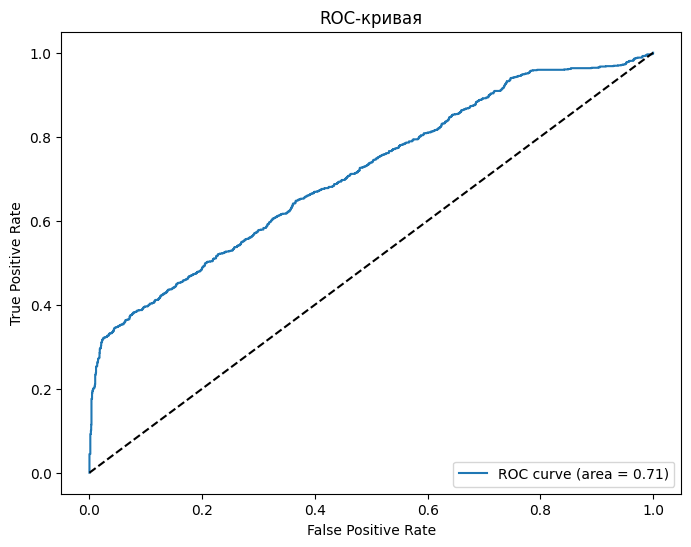

In [44]:
# Построение ROC-кривой

from sklearn.metrics import roc_curve, auc

# Предсказания вероятностей для тестовой выборки
Y_test_prob = model.predict_proba(X_test)[:, 1]

# Расчет ROC-кривой
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
roc_auc = auc(fpr, tpr)

# Построение графика
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()